# 重回帰分析とは

まず、単回帰分析について。

単回帰分析では、1つの目的変数(y)を1つの説明変数(x)で予測する。

下の単回帰式において、係数a,cを求めることを単回帰分析という。

\begin{equation*}  y = ax + c  \end{equation*}

そして、重回帰分析について。

重回帰分析では、2つ以上の説明変数が必要になる。

最高気温と通行人数を２つの説明変数とし、アイスクリームの売上額を目的変数として、重回帰分析を行ってみる。

データは、http://web.sfc.keio.ac.jp/~takefuji/ice.csv からダウンロード。

アイスクリームの売上の重回帰式は、
\begin{equation*} y = temp * x1 + street * x2 + c \end{equation*}

temp と　street は求めたい重回帰式の係数。

従来の統計手法では、R-squared値(実際のデータと予測値のフィット度)が予測の正確さを表現する。1に近いほど、正確なことを意味する。

機械学習では、データ（入力と出力)を学習器に与えることで、自動的にモデルを作成する。

### 1.1.0 最小二乗法OLS(Ordinary Least Square)

ここでは、statsmodelsのPythonライブラリを使う。

In [1]:
# ライブラリの呼び出し
import pandas as pd
import statsmodels.api as sm

# データの読み込み
data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
x = sm.add_constant(x) # 重回帰式の定数を設定
y = data['ice']

# statsmodelsライブラリのOLSアルゴリズム(最小2乗法)を使う
est = sm.OLS(y,x).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    ice   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     11.46
Date:                Sun, 01 Jan 2017   Prob (F-statistic):           0.000231
Time:                        17:53:16   Log-Likelihood:                -283.23
No. Observations:                  31   AIC:                             572.5
Df Residuals:                      28   BIC:                             576.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        794.1355   4699.350      0.169      0.8

実際のアイスクリームの売上と、予測子た売上をグラフ表示して、直感的に決定係数(フィット係数)を表示してくれるプログラムを示す。

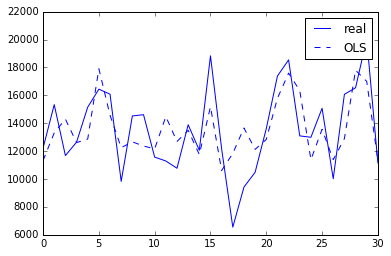

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0.0, 31.0) # 0.0から31.0の31個を表示
e = est.predict(x)

# '--'は大きい破線 ':'は細かい破線 '-'は実線 '-.'は一点鎖線
# b : blue, r: red, g : green, c : cyan, m : magenta, y : yellow, k : black, w : white
plt.plot(t,y,'-b')
plt.plot(t,e,'--b')
plt.legend(('real', 'OLS')) # 凡例を表示
plt.show()

### 1.1.1 一般化最小二乗法GLS(Generalized Least Squares)

In [3]:
import pandas as pd
import statsmodels.api as sm
data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
x = sm.add_constant(x)
y = data['ice']
est = sm.GLS(y,x).fit()
print(est.summary())

                            GLS Regression Results                            
Dep. Variable:                    ice   R-squared:                       0.450
Model:                            GLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     11.46
Date:                Sun, 01 Jan 2017   Prob (F-statistic):           0.000231
Time:                        17:53:36   Log-Likelihood:                -283.23
No. Observations:                  31   AIC:                             572.5
Df Residuals:                      28   BIC:                             576.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        794.1355   4699.350      0.169      0.8

OLSと同じ結果

### 1.1.2 加重最小二乗法WLS(Weighted Least Squares)

In [4]:
import pandas as pd
import statsmodels.api as sm
data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
x = sm.add_constant(x)
y = data['ice']
est = sm.WLS(y,x).fit()
print(est.summary())

                            WLS Regression Results                            
Dep. Variable:                    ice   R-squared:                       0.450
Model:                            WLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     11.46
Date:                Sun, 01 Jan 2017   Prob (F-statistic):           0.000231
Time:                        17:53:43   Log-Likelihood:                -283.23
No. Observations:                  31   AIC:                             572.5
Df Residuals:                      28   BIC:                             576.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        794.1355   4699.350      0.169      0.8

OLSやGLSとまったく同じ結果

### 1.1.3 ロバスト線形モデルRLM(Robust Linear Model)

RLMには、6つの評価基準関数が実装されている。(HuberT, LeastSquares, AndrewWave, RamsayE, TrimmeddMean, Hampel)

RLMには、R-squared値を計算する関数が用意されていないので、sklearn.metricsライブラリのr2_score関数を利用して計算する。

In [5]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import r2_score

data = pd.read_csv('../data/ice.csv')
x = data[['temp' , 'street']]
x = sm.add_constant(x)
y = data['ice']

est1 = sm.RLM(y, x, M=sm.robust.norms.HuberT()).fit()
est2 = sm.RLM(y, x, M=sm.robust.norms.LeastSquares()).fit()
est3 = sm.RLM(y, x, M=sm.robust.norms.AndrewWave()).fit()
est4 = sm.RLM(y, x, M=sm.robust.norms.RamsayE()).fit()
est5 = sm.RLM(y, x, M=sm.robust.norms.TrimmedMean()).fit()
est6 = sm.RLM(y, x, M=sm.robust.norms.Hampel()).fit()
r2 = r2_score(y, est1.predict(x))
print('R-squared:',r2)
print(est1.summary2())
r2 = r2_score(y, est2.predict(x))
print('R-squared:',r2)
print(est2.summary2())
r2 = r2_score(y, est3.predict(x))
print('R-squared:',r2)
print(est3.summary2())
r2 = r2_score(y, est4.predict(x))
print('R-squared:',r2)
print(est4.summary2())
r2 = r2_score(y, est5.predict(x))
print('R-squared:',r2)
print(est5.summary2())
r2 = r2_score(y, est6.predict(x))
print('R-squared:',r2)
print(est6.summary2())

R-squared: 0.448338473282
                 Results: Robust linear model
Model:                 RLM               Df Residuals:  28    
Dependent Variable:    ice               Norm:          HuberT
Date:                  2017-01-01 17:53  Scale Est.:    mad   
No. Observations:      31                Cov. Type:     H1    
Df Model:              2                 Scale:         2323.8
--------------------------------------------------------------
         Coef.    Std.Err.   z    P>|z|    [0.025     0.975]  
--------------------------------------------------------------
const  1221.9454 5062.1924 0.2414 0.8093 -8699.7695 11143.6602
temp    173.7148  157.1251 1.1056 0.2689  -134.2447   481.6743
street    1.2670    0.3052 4.1519 0.0000     0.6689     1.8651

R-squared: 0.450081118761
                 Results: Robust linear model
Model:              RLM              Df Residuals: 28          
Dependent Variable: ice              Norm:         LeastSquares
Date:               2017-01-01 17:

評価基準が変わっても、R-squared値は0.45付近

### 1.1.4 Lasso線形モデル

Lasso線形モデルには、実行結果のsummary()関数がない。


In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
x = sm.add_constant(x)
y = data['ice']

clf = linear_model.Lasso() # Lasso線形モデルを表現
clf.fit(x,y)
p = clf.predict(x)
print(clf.score(x,y)) # score関数 : R-squared値の計算をする
print(clf.intercept_) # intercept_関数 : 重回帰式の定数の値を示す
print(clf.coef_) # coef_関数 : 係数の値を示す

0.45008110592
797.692098965
[   0.          176.02585795    1.31035834]


### 1.1.5 自己相関付き実行可能一般化最小二乗法GLSAR(feasible generalized least squares with autocorrelated AR)

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
x = sm.add_constant(x)
y = data['ice']

est = sm.GLSAR(y,x).fit()
print(est.summary())

                           GLSAR Regression Results                           
Dep. Variable:                    ice   R-squared:                       0.450
Model:                          GLSAR   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     11.03
Date:                Sun, 01 Jan 2017   Prob (F-statistic):           0.000314
Time:                        17:54:01   Log-Likelihood:                -274.50
No. Observations:                  30   AIC:                             555.0
Df Residuals:                      27   BIC:                             559.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        180.1840   5015.182      0.036      0.9

### 1.1.6 混合線形モデルMixedLM(Mixed Linear Model)

MixedLMには、predict関数が実装されていないので、それに相当する予測値を計算する工夫が必要になる。

MixedLMを実行すると、est.params.temp変数にtempの係数、est.params.street変数にstreetの係数が代入される。

また、重回帰式のx1はdata['temp']、x2はdata['street']、cはest.params.Interceptで計算できる。

したがって、予測値を求める式は次のようになる。

e = est.params.temp*data['temp'] + est.params.street*data['street'] + est.params.Intercept

このe変数は、predict(x)に相当する予測値になる。

また、混合線形モデルは、次式で表す。

est = sm.MixedLM.from_formula("ice ~ temp + street", data, groups=y).fit

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import r2_score

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
x = sm.add_constant(x)
y = data['ice']

est = sm.MixedLM.from_formula("ice ~ temp + street", data, groups=y).fit()
print(est.params)
e = est.params.temp*data['temp'] + est.params.street*data['street'] + est.params.Intercept
print('R-squared:', r2_score(y,e))

Intercept       794.135485
temp            176.143803
street            1.310358
Intercept RE      1.000000
dtype: float64
R-squared: 0.450081118761


/Users/hidemaro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/statsmodels/regression/mixed_linear_model.py:160: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self._params = np.zeros(self.k_tot)


### 1.1.7 分位点回帰QuantReg

quantile_regression関数が重要な役割を果たす

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
x = sm.add_constant(x)
y = data['ice']

est = QuantReg(y,x).fit(q=0.99999)
print(est.summary())

                         QuantReg Regression Results                          
Dep. Variable:                    ice   Pseudo R-squared:               0.5776
Model:                       QuantReg   Bandwidth:                         nan
Method:                 Least Squares   Sparsity:                          nan
Date:                Sun, 01 Jan 2017   No. Observations:                   31
Time:                        17:54:12   Df Residuals:                       28
                                        Df Model:                            2
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        706.0755        nan        nan        nan           nan       nan
temp         273.4424        nan        nan        nan           nan       nan
street         1.3770        nan        nan        nan           nan       nan

The condition number is large, 6.5e+04. This might 

/Users/hidemaro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)


今までのアルゴリズムと違って、R-squared値が0.5776と高くなっている。

次のプログラムのように、重回帰式を直接書くこともできる。

est = smf.quantreg('ice ~ temp + street',data).fit(q=.999)

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.quantile_regression import QuantReg
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('../data/ice.csv')
data = sm.add_constant(data)
x = data[['temp', 'street']]
y = data['ice']

est = smf.quantreg('ice ~ temp + street',data).fit(q=.999)
print(est.summary())

/Users/hidemaro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/hidemaro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/hidemaro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/hidemaro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/hidemaro/.pyenv/versions/anaconda

                         QuantReg Regression Results                          
Dep. Variable:                    ice   Pseudo R-squared:               0.5756
Model:                       QuantReg   Bandwidth:                         nan
Method:                 Least Squares   Sparsity:                          nan
Date:                Sun, 01 Jan 2017   No. Observations:                   31
Time:                        17:54:19   Df Residuals:                       28
                                        Df Model:                            2
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    706.0655        nan        nan        nan           nan       nan
temp         273.4426        nan        nan        nan           nan       nan
street         1.3770        nan        nan        nan           nan       nan

The condition number is large, 6.5e+04. This might 

/Users/hidemaro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/hidemaro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/statsmodels/regression/quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  IterationLimitWarning)


### 1.1.8 OMP手法(Orthogonal Matching Pursuit)

OMP手法モデルは次式で表す。

lm = OrthogonalMatchingPursuit(n_nonzero_coefs=3)

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import OrthogonalMatchingPursuit

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
x = sm.add_constant(x)
y = data['ice']

lm = OrthogonalMatchingPursuit(n_nonzero_coefs=3)
est = lm.fit(x,y)
print(est.coef_)
print(est.intercept_)
print(est.score(x,y))

[   0.          176.14380327    1.31035753]
794.135485417
0.450081118761


/Users/hidemaro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/sklearn/linear_model/omp.py:658: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return_n_iter=True)


### 1.1.9 イラスティックネット(ElasticNet)

このモデルは、次式で表現する。

clf = ElasticNet(alpha=0.01)

In [12]:
import pandas as pd
from sklearn.linear_model import ElasticNet

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
y = data['ice']

clf = ElasticNet(alpha=0.01)
clf.fit(x,y)
print(clf.score(x,y))

0.450081108699
